In [1]:
import sys
sys.path.append('..')
import numpy as np
import json
import matplotlib.pyplot as plt
from janusq.cloud_interface import submit, get_result
from janusq.data_objects.circuit import Circuit

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)

circuit = Circuit(qc)
print(json.dumps(circuit))

[[{"name": "h", "qubits": [0], "params": []}], [{"name": "cx", "qubits": [0, 1], "params": []}], [{"name": "cx", "qubits": [1, 2], "params": []}], [{"name": "cx", "qubits": [2, 3], "params": []}]]


In [3]:
circuit = circuit # circuit need to run
label = 'VQA'
shots = 3000
run_type = 'simulator'
result = submit(circuit=circuit, label=label, shots=shots, run_type=run_type, API_TOKEN='1')
print(result)

{'status': 0, 'msg': '成功', 'data': {'result_id': '402bb649de8749bf8e2bbb8662f77bb3'}}


In [4]:
result_id = result['data']['result_id']
result = get_result(result_id, run_type=run_type, result_format='probs')
print(result)

[0.49666667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.50333333]


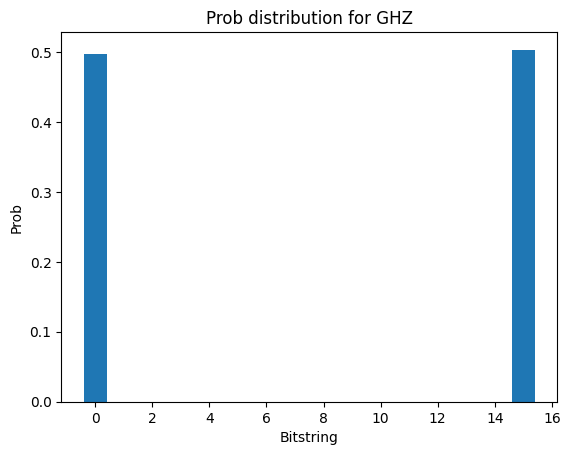

In [5]:
x = range(len(result))

plt.bar(x, result)
plt.xlabel('Bitstring')
plt.ylabel('Prob')
plt.title('Prob distribution for GHZ')
plt.show()

In [17]:
# W state
qnum = 4
qc = QuantumCircuit(qnum)

def CG_gate(qc: QuantumCircuit, q_idx: int, qnum: int):
    theta = np.arccos(np.sqrt(1/(q_idx+2)))
    qc.ry(-theta, q_idx)
    qc.cz(q_idx, q_idx+1)
    qc.ry(theta, q_idx)

qc.rx(np.pi, qnum-1)

for q_idx in np.arange(qnum-2, -1, -1):
    CG_gate(qc, q_idx, qnum)

for q_idx in np.arange(qnum-2, -1, -1):
    qc.cx(q_idx, q_idx+1)

circuit = Circuit(qc)

circuit = circuit # circuit need to run
label = 'w_state'
shots = 3000
run_type = 'sqcg'

result = submit(circuit=circuit, label=label, shots=shots, run_type=run_type, API_TOKEN='1')
print(result)


{'status': 0, 'msg': '成功', 'data': {'result_id': '2185fc208e994abebcdea7a784e35107'}}


In [18]:
result_id = result['data']['result_id']
result = get_result(result_id, run_type=run_type, result_format='probs')
print(result)

[0.0070269970255934545, 0.24856404168423007, 0.24741383136646627, 0.0004672583284200538, 0.24182089571336302, 0.0, 0.00034981953207358557, 0.0010342824670959625, 0.24586712994887205, 0.001413438565241154, 0.000763283615013851, 0.001277437261232435, 0.001196122472681905, 0.0012037482173909895, 0.0016017138023250706, 0.0]


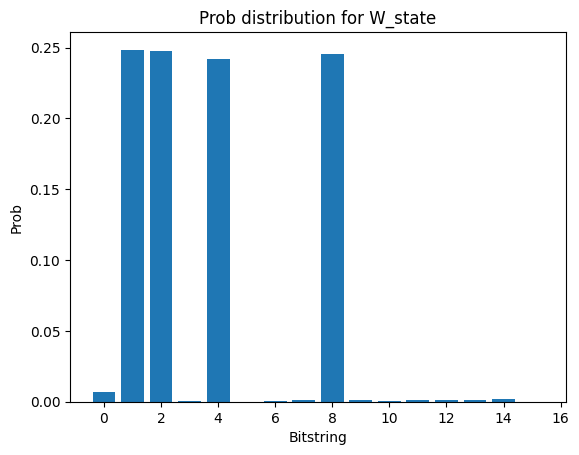

In [19]:
x = range(len(result))

plt.bar(x, result)
plt.xlabel('Bitstring')
plt.ylabel('Prob')
plt.title('Prob distribution for W_state')
plt.show()